In [ ]:
!git clone https://github.com/kailas93/Tree_Species.git

Cloning into 'Tree_Species'...
remote: Enumerating objects: 2763, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 2763 (delta 5), reused 68 (delta 0), pack-reused 2681 (from 1)
Receiving objects: 100% (2763/2763), 77.23 MiB | 18.21 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Error downloading object: 5M_trees/Albuquerque_Final_2022-06-18.csv (4ff64ce): Smudge error: Error downloading 5M_trees/Albuquerque_Final_2022-06-18.csv (4ff64ced7b7eec3fdbf7061e85a18f7b75eb30f7873cc3bc5b96029841be68f5): batch response: This repository exceeded its LFS budget. The account responsible for the budget should increase it to restore access.

Errors logged to /content/Tree_Species/.git/lfs/logs/20250730T131055.093670513.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: 5M_trees/Albuquerque_Final_2022-06-18.csv: smudge filter lfs failed
You can inspect what was checked out wit

In [ ]:
import os

repo_path = "/content/Tree_Species/Tree_Species_Dataset"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))


Contents: ['neem', 'other', 'gunda', 'vad', 'pipal', 'champa', 'garmalo', 'kesudo', 'bili', 'nilgiri', 'sugarcane', 'coconut', 'gulmohor', 'simlo', 'sitafal', 'banyan', 'shirish', 'asopalav', 'jamun', 'mango', 'amla', 'kanchan', 'saptaparni', 'motichanoti', 'bamboo', 'babul', 'sonmahor', 'cactus', 'pilikaren', 'khajur']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 30


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1600


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


       Image Count
other          150
neem            50
gunda           50
vad             50
pipal           50
shape:  (30, 1)


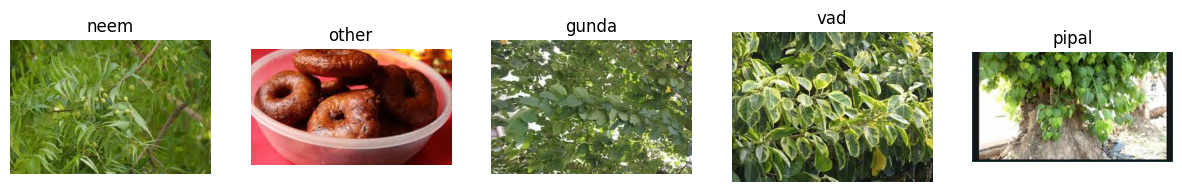

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [ ]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,275,183
1,300,168
2,194,259
3,260,194
4,239,211


In [ ]:
print(shapes_df.describe())


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 0


Duplicate set 1:


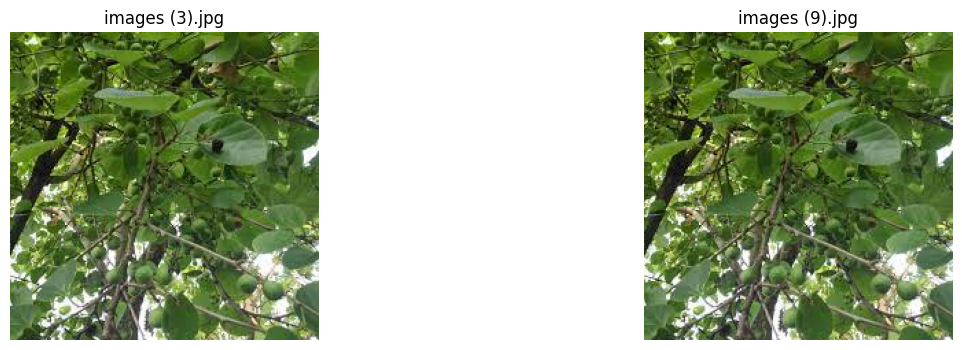

Duplicate set 2:


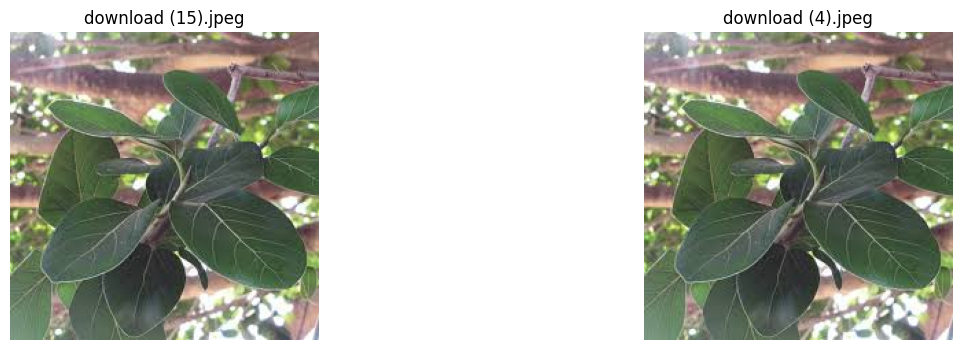

Duplicate set 3:


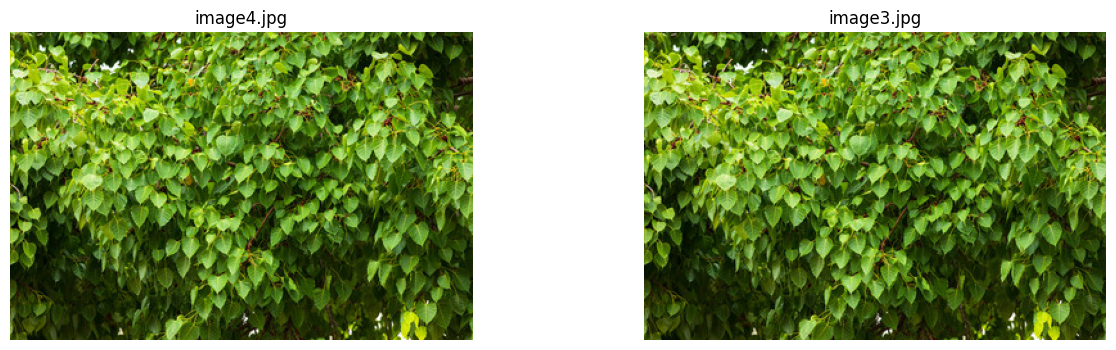

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


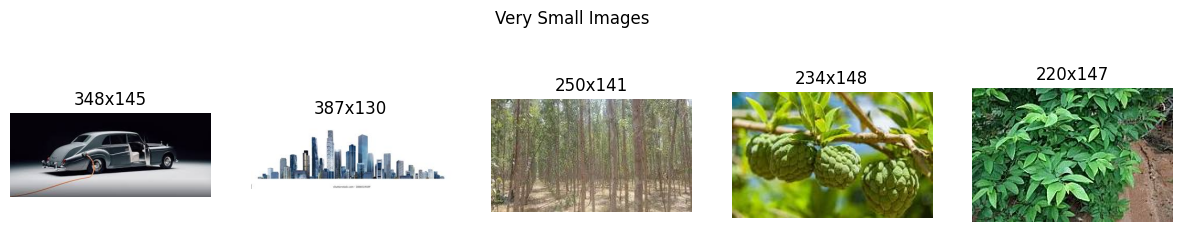

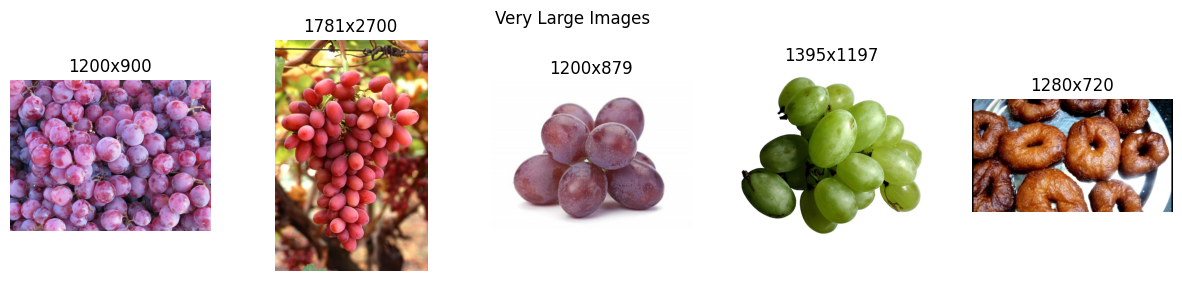

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.0472 - loss: 3.4531 - val_accuracy: 0.0903 - val_loss: 3.3916
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.0602 - loss: 3.4030 - val_accuracy: 0.0903 - val_loss: 3.3890
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.0757 - loss: 3.3848 - val_accuracy: 0.0903 - val_loss: 3.3789
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 502ms/step - accuracy: 0.0738 - loss: 3.3926 - val_accuracy: 0.0903 - val_loss: 3.3740
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.0834 - loss: 3.3720 - val_accuracy: 0.0903 - val_loss: 3.3772
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.0780 - loss: 3.3880 - val_accuracy: 0.0903 - val_loss: 3.3731
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - accuracy: 0.0826 - loss: 3.3829 - val_accuracy: 0.0903 - val_loss: 3.3759
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 447ms/step - accuracy: 0.0784 - loss: 3.3843 - val_accurac

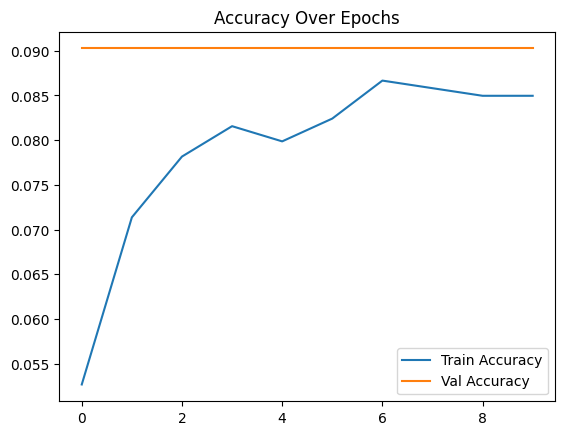

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 651ms/step - accuracy: 0.0492 - loss: 3.7095 - val_accuracy: 0.0903 - val_loss: 3.2684
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 508ms/step - accuracy: 0.0879 - loss: 3.3133 - val_accuracy: 0.1264 - val_loss: 3.0425
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 448ms/step - accuracy: 0.1243 - loss: 3.1357 - val_accuracy: 0.1444 - val_loss: 2.9853
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy: 0.1286 - loss: 3.0791 - val_accuracy: 0.1733 - val_loss: 2.8385
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 443ms/step - accuracy: 0.1623 - loss: 2.8987 - val_accuracy: 0.2347 - val_loss: 2.7305
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 439ms/step - accuracy: 0.1613 - loss: 2.9111 - val_accuracy: 0.2166 - val_loss: 2.6800
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.1971 - loss: 2.7712 - val_accuracy: 0.2563 - val_loss: 2.6501
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 439ms/step - accuracy: 0.2271 - loss: 2.6793 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


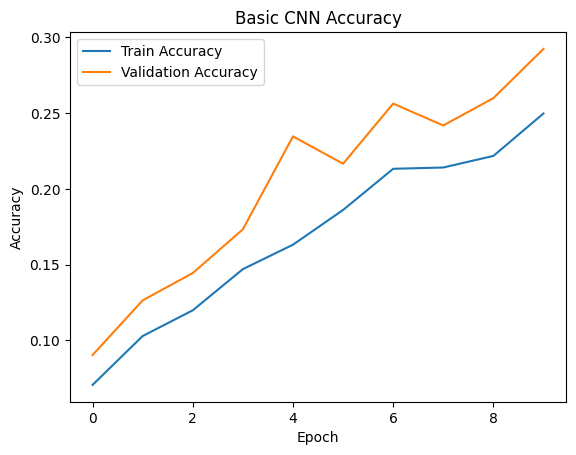

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=50)

model.save("improved_cnn_model.h5")


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 578ms/step - accuracy: 0.0681 - loss: 5.3232 - val_accuracy: 0.0325 - val_loss: 9.0403
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 507ms/step - accuracy: 0.1199 - loss: 3.1765 - val_accuracy: 0.0325 - val_loss: 15.6891
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 451ms/step - accuracy: 0.1232 - loss: 3.1628 - val_accuracy: 0.0325 - val_loss: 21.8017
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 460ms/step - accuracy: 0.1396 - loss: 3.0931 - val_accuracy: 0.0325 - val_loss: 24.7847
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 483ms/step - accuracy: 0.1651 - loss: 3.0548 - val_accuracy: 0.0325 - val_loss: 24.4723
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - accuracy: 0.1389 - loss: 3.0432 - val_accuracy: 0.0325 - val_loss: 26.5332
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.1690 - loss: 2.9288 - val_accuracy: 0.0325 - val_loss: 24.8108
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 447ms/step - accuracy: 0.2053 - loss: 2.9052 - va

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


model = load_model("/content/improved_cnn_model.h5")


model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=50,
    epochs=120
)


model.save("improved_cnn_model_updated.keras")


Epoch 51/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 626ms/step - accuracy: 0.4465 - loss: 1.8427 - val_accuracy: 0.4116 - val_loss: 3.0770
Epoch 52/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 447ms/step - accuracy: 0.4755 - loss: 1.8097 - val_accuracy: 0.4116 - val_loss: 2.9967
Epoch 53/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 469ms/step - accuracy: 0.4747 - loss: 1.8553 - val_accuracy: 0.3863 - val_loss: 3.1569
Epoch 54/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 453ms/step - accuracy: 0.4689 - loss: 1.7892 - val_accuracy: 0.3863 - val_loss: 2.9841
Epoch 55/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 483ms/step - accuracy: 0.4919 - loss: 1.7195 - val_accuracy: 0.3827 - val_loss: 2.9544
Epoch 56/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.4809 - loss: 1.8420 - val_accuracy: 0.4332 - val_loss: 2.9549
Epoch 57/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.5210 - loss: 1.6847 - val_accuracy: 0.4332 - val_loss: 2.9563
Epoch 58/120
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - accuracy: 0.5385 - loss: 1

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


model = load_model("/content/improved_cnn_model_updated.keras")


model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=120,
    epochs=250
)


model.save("imp_cnn_mod_updated.keras")


Epoch 121/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 569ms/step - accuracy: 0.7051 - loss: 0.9310 - val_accuracy: 0.4801 - val_loss: 3.4070
Epoch 122/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 478ms/step - accuracy: 0.7074 - loss: 0.9053 - val_accuracy: 0.4513 - val_loss: 3.4084
Epoch 123/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.7147 - loss: 0.9116 - val_accuracy: 0.4368 - val_loss: 3.8800
Epoch 124/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - accuracy: 0.7118 - loss: 1.0152 - val_accuracy: 0.4729 - val_loss: 3.5463
Epoch 125/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 466ms/step - accuracy: 0.7037 - loss: 0.9281 - val_accuracy: 0.4729 - val_loss: 3.6298
Epoch 126/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 502ms/step - accuracy: 0.7335 - loss: 0.8571 - val_accuracy: 0.4874 - val_loss: 3.4420
Epoch 127/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.6785 - loss: 1.0335 - val_accuracy: 0.4621 - val_loss: 3.8160
Epoch 128/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.7434 -

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


model = load_model("/content/imp_cnn_mod_updated.keras")

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    train_generator,
    validation_data=val_generator,
    initial_epoch=250,
    epochs=350
)


model.save("imp1_cnn_mod_updated.keras")


Epoch 251/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 562ms/step - accuracy: 0.8648 - loss: 0.4253 - val_accuracy: 0.4946 - val_loss: 5.2274
Epoch 252/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 448ms/step - accuracy: 0.8649 - loss: 0.3965 - val_accuracy: 0.4982 - val_loss: 4.1353
Epoch 253/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 486ms/step - accuracy: 0.8608 - loss: 0.4538 - val_accuracy: 0.5054 - val_loss: 5.2152
Epoch 254/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.8612 - loss: 0.4677 - val_accuracy: 0.5018 - val_loss: 4.4805
Epoch 255/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.8686 - loss: 0.4430 - val_accuracy: 0.4477 - val_loss: 4.8671
Epoch 256/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 464ms/step - accuracy: 0.8515 - loss: 0.4856 - val_accuracy: 0.4693 - val_loss: 3.9611
Epoch 257/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 445ms/step - accuracy: 0.8336 - loss: 0.4736 - val_accuracy: 0.4910 - val_loss: 3.7592
Epoch 258/350
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step - accuracy: 0.8731 -

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model("/content/imp1_cnn_mod_updated.keras")

# Load and preprocess the image
def preprocess_image(path):
    img = load_img(path, target_size=(224, 224))  # Resize to model input size
    img = img_to_array(img)                       # Convert to array
    img = img / 255.0                             # Normalize
    img = np.expand_dims(img, axis=0)             # Add batch dimension
    return img

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Step 1: Map class indices to species names
repo_path = "/content/drive/MyDrive/archive (3)/Tree_Species_Dataset"
class_dirs = sorted(os.listdir(repo_path))  # Ensure consistent ordering
class_names = {i: name for i, name in enumerate(class_dirs)}

# Step 2: Preprocess the image
def preprocess_image(img_path):
    img = keras_image.load_img(img_path, target_size=(224, 224))  # adjust size if needed
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Step 3: Load and predict
image_path = "/content/drive/MyDrive/archive (3)/Tree_Species_Dataset/motichanoti/download (11).jpg"
image = preprocess_image(image_path)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

predicted_species_name = class_names[predicted_class]

print(f"🌳 Predicted species: {predicted_species_name} (Confidence: {confidence * 100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🌳 Predicted species: simlo (Confidence: 97.39%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_dirs = sorted(os.listdir(repo_path))  # Ensures consistent ordering
class_names = {i: name for i, name in enumerate(class_dirs)}